In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

df = pd.read_csv('./DATA/lininterpolated.csv')
df.dropna(axis = 0, inplace = True)
data_dum = pd.get_dummies(df, columns=["Country"])

train_df = data_dum.drop(data_dum[data_dum['Year'] == 2019].index)
val = data_dum.loc[data_dum['Year'] == 2019]
X_val = val.drop('Price_USD_tonne',  axis=1, inplace = False)
print(val.columns)
y_val = val['Price_USD_tonne']
print(y_val)

Index(['Year', 'Area_ha', 'Price_USD_tonne', 'Yield_hg_ha',
       'TotalYield_tonnes', 'Country_Albania', 'Country_Algeria',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       'Country_Austria', 'Country_Azerbaijan', 'Country_Belarus',
       'Country_Belgium', 'Country_Bhutan',
       'Country_Bolivia (Plurinational State of)',
       'Country_Bosnia and Herzegovina', 'Country_Brazil', 'Country_Bulgaria',
       'Country_Canada', 'Country_Chile', 'Country_China',
       'Country_China, mainland', 'Country_Colombia', 'Country_Croatia',
       'Country_Cyprus', 'Country_Czechia', 'Country_Denmark',
       'Country_Ecuador', 'Country_Egypt', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Georgia',
       'Country_Germany', 'Country_Greece', 'Country_Grenada',
       'Country_Hungary', 'Country_India',
       'Country_Iran (Islamic Republic of)', 'Country_Iraq', 'Country_Israel',
       'Country_Italy', 'Country_Japan', 'Country_Jordan',
 

In [3]:

X_train,X_test,y_train,y_test = train_test_split(train_df, train_df.Price_USD_tonne, test_size=0.2)
X_train.drop(['Price_USD_tonne'], axis=1, inplace=True) 
X_test.drop(['Price_USD_tonne'], axis=1, inplace=True) 
print(X_train.isna().any())

Year                                                            False
Area_ha                                                         False
Yield_hg_ha                                                     False
TotalYield_tonnes                                               False
Country_Albania                                                 False
                                                                ...  
Country_United Kingdom of Great Britain and Northern Ireland    False
Country_United States of America                                False
Country_Uruguay                                                 False
Country_Yemen                                                   False
Country_Zimbabwe                                                False
Length: 86, dtype: bool


/Users/kath/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Is there correlation between area, yield and producer price ?
Linear regrassion

In [4]:
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
score = reg.score(X_train, y_train)
prediction = reg.predict(X_test)
coeffients = pd.DataFrame({'features':X_train.columns, 'coef':reg.coef_})

Mean squared error: 2956294.33
Coefficient of determination: -11.22


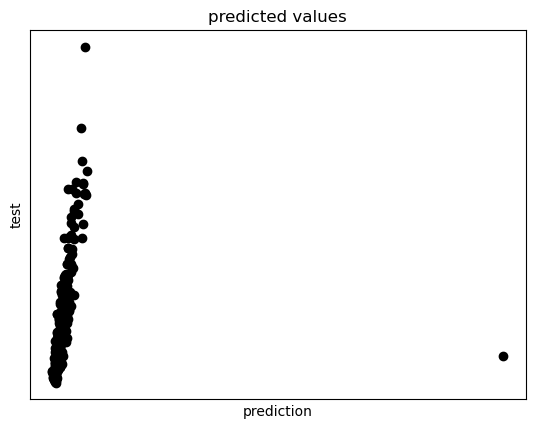

In [5]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, prediction))

# Plot outputs
plt.scatter(prediction, y_test, color="black")
#plt.plot(prediction, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.xlabel('prediction')
plt.yticks(())
plt.ylabel('test')
plt.title("predicted values")

plt.show()

In [6]:
validation = reg.predict(X_val)
print("Mean squared error: %.2f" % mean_squared_error(y_val, validation))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, validation))

Mean squared error: 52676.07
Coefficient of determination: 0.74


Lasso regression

Mean squared error: 60472.86
Coefficient of determination: 0.75


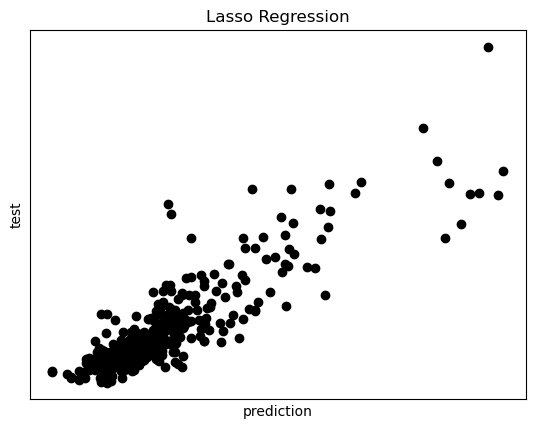

In [7]:
from sklearn.linear_model import Ridge, Lasso

clf_Las = Lasso().fit(X_train, y_train)
score = clf_Las.score(X_train, y_train)
prediction = clf_Las.predict(X_test)
coefficients = pd.DataFrame({'features':X_train.columns, 'coef':clf_Las .coef_})
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, prediction))

# Plot outputs
plt.scatter(prediction, y_test, color="black")
#plt.plot(prediction, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.xlabel('prediction')
plt.yticks(())
plt.ylabel('test')
plt.title("Lasso Regression")

plt.show()

In [8]:
print("R squared: %.2f" % r2_score(y_test, prediction))

R squared: 0.75


In [9]:
print(coefficients)

                                             features        coef
0                                                Year   15.735063
1                                             Area_ha   -0.000011
2                                         Yield_hg_ha    0.000145
3                                   TotalYield_tonnes    0.000003
4                                     Country_Albania  -30.715021
..                                                ...         ...
81  Country_United Kingdom of Great Britain and No...  353.965991
82                   Country_United States of America    0.000000
83                                    Country_Uruguay  256.738628
84                                      Country_Yemen  611.319334
85                                   Country_Zimbabwe    0.000000

[86 rows x 2 columns]


Lasso model may be used for feature selection: according the assigned coefficients the producer price is mainly dependent on country and year. Both this parameters reflect both climatic and economical variations. 

In [10]:
validation = clf_Las.predict(X_val)
print("Mean squared error: %.2f" % mean_squared_error(y_val, validation))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, validation))

Mean squared error: 62605.18
Coefficient of determination: 0.69


Ridge regression

Mean squared error: 48578.82
Coefficient of determination: 0.80


/Users/kath/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45009e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


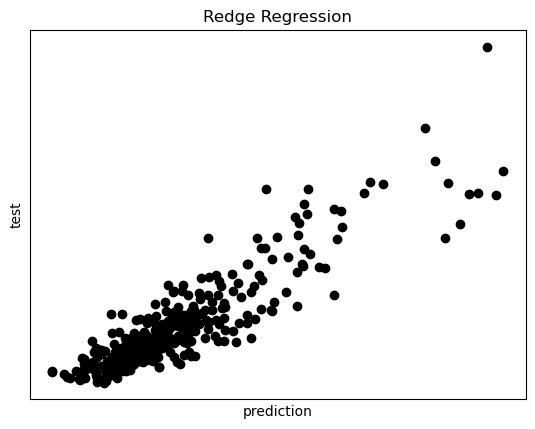

In [11]:
clf = Ridge().fit(X_train, y_train)
score = clf.score(X_train, y_train)
prediction = clf.predict(X_test)
coefficients = pd.DataFrame({'features':X_train.columns, 'coef':clf_Las .coef_})
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, prediction))

# Plot outputs
plt.scatter(prediction, y_test, color="black")
#plt.plot(prediction, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.xlabel('prediction')
plt.yticks(())
plt.ylabel('test')
plt.title("Redge Regression")

plt.show()

In [12]:
validation = clf.predict(X_val)
print("Mean squared error: %.2f" % mean_squared_error(y_val, validation))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, validation))

Mean squared error: 55495.02
Coefficient of determination: 0.73


Random forest regression

Mean Absolute Error: 541.9710057401217
Mean Squared Error: 534411.4520451928
Root Mean Squared Error: 731.0345081083333


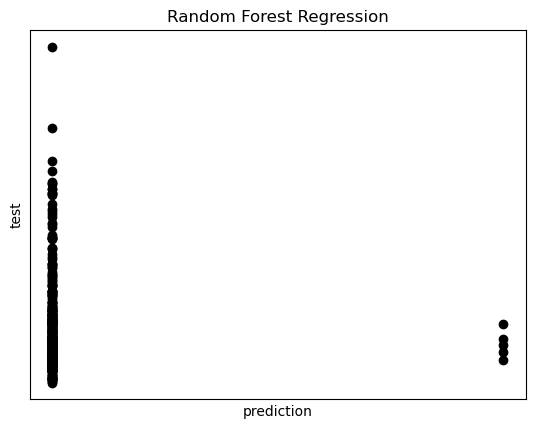

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics

X_train, y_train = make_regression(n_features=86, n_informative=2,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Plot outputs
plt.scatter(prediction, y_test, color="black")
#plt.plot(prediction, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.xlabel('prediction')
plt.yticks(())
plt.ylabel('test')
plt.title("Random Forest Regression")

plt.show()

No correlation, let's try out drop features that has been defined redundant by Lasso

In [14]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()

X_train_temp = pd.DataFrame(X_train_2)
print(type)
X_test_temp = pd.DataFrame(X_test_2

X_train_temp = X_train_temp.drop(['Area_ha', 'Yield_hg_ha', 'TotalYield_tonnes'], axis=1) 
X_test_temp = X_test_temp.drop(['Area_ha', 'Yield_hg_ha', 'TotalYield_tonnes'], axis=1) 

X_train_temp, y_train_temp = make_regression(n_features=83, n_informative=2,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_temp, y_train_temp)
prediction = regr.predict(X_test_temp)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_temp, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_temp, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_temp, prediction)))

# Plot outputs
plt.scatter(prediction, y_test_temp, color="black")
#plt.plot(prediction, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.xlabel('prediction')
plt.yticks(())
plt.ylabel('test')
plt.title("Random Forest Regression")

plt.show()

SyntaxError: invalid syntax (<ipython-input-14-342cc555b065>, line 7)

Let's try to check wether there is correlation between initial variables of interest at all. Let's exclude countries

In [ ]:
X_train_temp = pd.DataFrame(X_train, columns = ['Year', 'Area_ha', 'Yield_hg_ha', 'TotalYield_tonnes'])
X_test_temp = pd.DataFrame(X_test, columns = ['Year', 'Area_ha', 'Yield_hg_ha', 'TotalYield_tonnes'])

X_train_temp, y_train_temp = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_temp, y_train_temp)
prediction = regr.predict(X_test_temp)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_temp, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_temp, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_temp, prediction)))

# Plot outputs
plt.scatter(prediction, y_test_temp, color="black")
#plt.plot(prediction, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.xlabel('prediction')
plt.yticks(())
plt.ylabel('test')
plt.title("Random Forest Regression")

plt.show()